<a href="https://colab.research.google.com/github/Rnrb39/Challenge_data_science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
def ventas_por_tienda(tienda):
  ventas = tienda['Precio'].sum()
  return ventas

In [3]:
total_ventas = dict(venta_tienda = ventas_por_tienda(tienda), venta_tienda2 = ventas_por_tienda(tienda2), venta_tienda3 = ventas_por_tienda(tienda3), venta_tienda4 = ventas_por_tienda(tienda4))
total_ventas

{'venta_tienda': np.float64(1150880400.0),
 'venta_tienda2': np.float64(1116343500.0),
 'venta_tienda3': np.float64(1098019600.0),
 'venta_tienda4': np.float64(1038375700.0)}

In [4]:
def comparacion (total_ventas):
  for tienda, ventas in total_ventas.items():
    print(f'La tienda {tienda} vendió {ventas}')

comparacion(total_ventas)


La tienda venta_tienda vendió 1150880400.0
La tienda venta_tienda2 vendió 1116343500.0
La tienda venta_tienda3 vendió 1098019600.0
La tienda venta_tienda4 vendió 1038375700.0


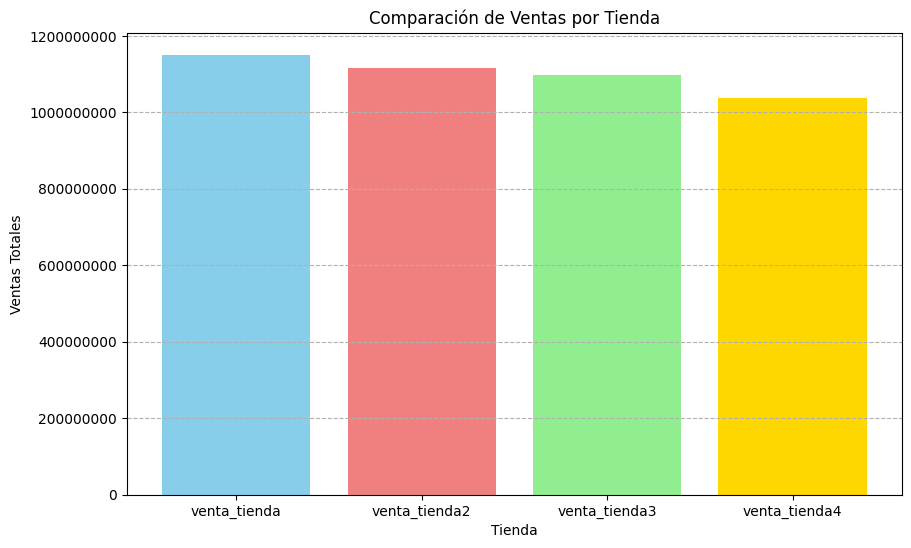

In [5]:
import matplotlib.pyplot as plt
import numpy as np

nombres_de_tiendas = list(total_ventas.keys())
ventas_totales = list(total_ventas.values())

plt.figure(figsize=(10, 6))
plt.bar(nombres_de_tiendas, ventas_totales, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')
plt.title('Comparación de Ventas por Tienda')
plt.grid(axis='y', linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.show()




# 2. Ventas por categoría

In [6]:
from collections import Counter

def contar_y_formatear_palabras_counter(tienda):
  conteo_palabras = Counter(tienda)
  lista_resultado = [f"{palabra}({conteo})" for palabra, conteo in conteo_palabras.items()]
  return lista_resultado


In [17]:
venta_categoria_tienda = contar_y_formatear_palabras_counter(tienda['Categoría del Producto'])
venta_categoria_tienda2 = contar_y_formatear_palabras_counter(tienda2['Categoría del Producto'])
venta_categoria_tienda3 = contar_y_formatear_palabras_counter(tienda3['Categoría del Producto'])
venta_categoria_tienda4 = contar_y_formatear_palabras_counter(tienda4['Categoría del Producto'])

In [19]:
venta_categoria_tienda

['Electrodomésticos(254)',
 'Muebles(480)',
 'Deportes y diversión(277)',
 'Libros(187)',
 'Electrónicos(451)',
 'Instrumentos musicales(170)',
 'Juguetes(338)',
 'Artículos para el hogar(201)']

In [20]:
venta_categoria_tienda2


['Muebles(442)',
 'Instrumentos musicales(224)',
 'Deportes y diversión(275)',
 'Electrónicos(422)',
 'Artículos para el hogar(181)',
 'Juguetes(313)',
 'Electrodomésticos(305)',
 'Libros(197)']

In [21]:
venta_categoria_tienda3

['Electrodomésticos(278)',
 'Muebles(499)',
 'Instrumentos musicales(177)',
 'Deportes y diversión(277)',
 'Electrónicos(451)',
 'Juguetes(315)',
 'Artículos para el hogar(177)',
 'Libros(185)']

In [22]:
venta_categoria_tienda4

['Electrodomésticos(254)',
 'Muebles(480)',
 'Deportes y diversión(277)',
 'Libros(187)',
 'Electrónicos(451)',
 'Instrumentos musicales(170)',
 'Juguetes(338)',
 'Artículos para el hogar(201)']

In [63]:
def convertir_lista_a_dict(lista_tienda, nombre_tienda):
    diccionario_tienda = {}
    for item in lista_tienda:
        partes = item.split('(')
        categoria = partes[0]
        valor = int(partes[1][:-1])
        diccionario_tienda[categoria] = valor
    return diccionario_tienda


In [64]:
datos_combinados = {
    "Tienda 1": convertir_lista_a_dict(venta_categoria_tienda, "Tienda 1"),
    "Tienda 2": convertir_lista_a_dict(venta_categoria_tienda2, "Tienda 2"),
    "Tienda 3": convertir_lista_a_dict(venta_categoria_tienda3, "Tienda 3"),
    "Tienda 4": convertir_lista_a_dict(venta_categoria_tienda4, "Tienda 4")
}

In [65]:
print(datos_combinados)

{'Tienda 1': {'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}, 'Tienda 2': {'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}, 'Tienda 3': {'Electrodomésticos': 278, 'Muebles': 499, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Libros': 185}, 'Tienda 4': {'Electrodomésticos': 254, 'Muebles': 480, 'Deportes y diversión': 277, 'Libros': 187, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Artículos para el hogar': 201}}


In [62]:
convertir_lista_a_dict(venta_categoria_tienda,'tienda1')

{'Electrónicos': 448,
 'Muebles': 465,
 'Juguetes': 324,
 'Electrodomésticos': 312,
 'Artículos para el hogar': 171,
 'Deportes y diversión': 284,
 'Libros': 173,
 'Instrumentos musicales': 182}

In [50]:
def grafico_pastel_venta_categorias(venta_categoria_tienda, nombre_tienda):
  categorias = []
  valores = []
  espacio_titulo = 20
  for item in venta_categoria_tienda:
    partes = item.split('(')
    categoria = partes[0]
    valor = int(partes[1][:-1])
    categorias.append(categoria)
    valores.append(valor)

  plt.figure(figsize=(3, 3))
  plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=140)
  plt.title(f'Distribución de Productos por Categoría - {nombre_tienda}', pad=espacio_titulo)
  plt.axis('equal')
  plt.show()


In [77]:
def grafico_barras_comparativo(datos_tiendas, espacio_entre_grupos=0.5, espacio_entre_barras=0.2, rotacion_etiquetas=90):
    nombres_tiendas = list(datos_tiendas.keys())
    categorias_todas = set()
    for tienda_data in datos_tiendas.values():
        categorias_todas.update(tienda_data.keys())
    categorias = sorted(list(categorias_todas))
    num_categorias = len(categorias)
    num_tiendas = len(nombres_tiendas)
    ancho_barra_base = 1.0 / (num_tiendas + (num_tiendas - 1) * espacio_entre_barras)
    ancho_barra = ancho_barra_base
    indices_categorias = np.arange(num_categorias)

    plt.figure(figsize=(12, 7))

    for i, nombre_tienda in enumerate(nombres_tiendas):
        ventas_tienda = [datos_tiendas[nombre_tienda].get(cat, 0) for cat in categorias]
        posicion_grupo = indices_categorias * (1 + espacio_entre_grupos)
        posicion_barra = posicion_grupo + i * (ancho_barra * (1 + espacio_entre_barras))
        plt.bar(posicion_barra, ventas_tienda, ancho_barra, label=nombre_tienda)

    plt.xlabel('Categoría del Producto')
    plt.ylabel('Ventas')
    plt.title('Comparativa de Ventas por Categoría entre Tiendas')
    plt.xticks(indices_categorias * (1 + espacio_entre_grupos) + (num_tiendas * ancho_barra * (1 + espacio_entre_barras) / 2) - (ancho_barra * (1 + espacio_entre_barras) / 2), categorias, rotation=rotacion_etiquetas, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

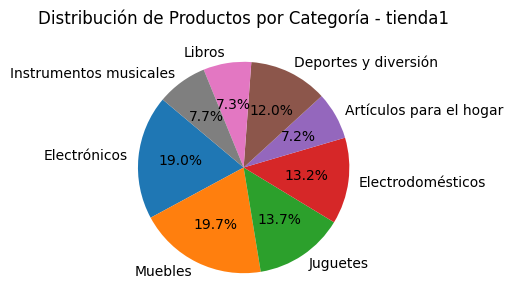

In [51]:
grafico_pastel_venta_categorias(venta_categoria_tienda,'tienda1' )

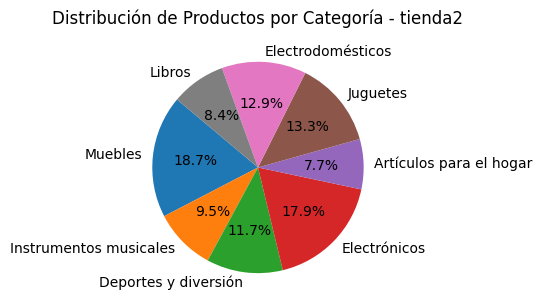

In [52]:
grafico_pastel_venta_categorias(venta_categoria_tienda2,'tienda2' )

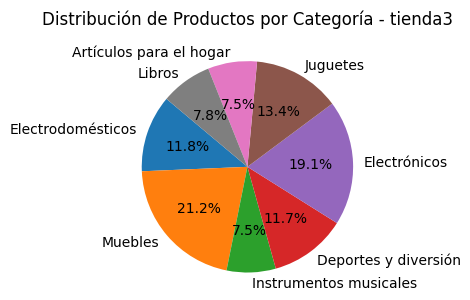

In [53]:
grafico_pastel_venta_categorias(venta_categoria_tienda3,'tienda3' )

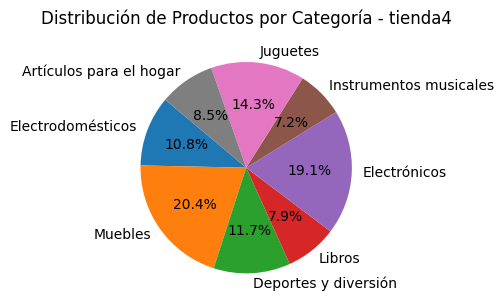

In [54]:
grafico_pastel_venta_categorias(venta_categoria_tienda4,'tienda4' )

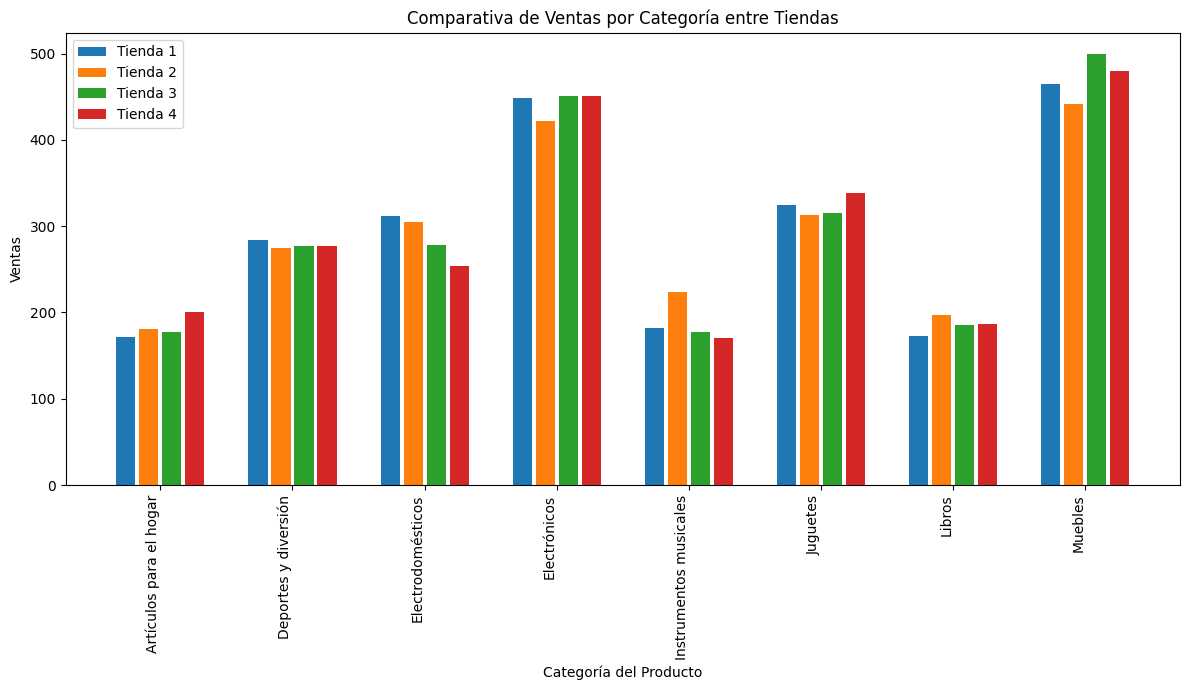

In [78]:
grafico_barras_comparativo(datos_combinados)

# 3. Calificación promedio de la tienda


In [ ]:
def promedio_calificacion(tienda):
  ventas = tienda['Precio'].sum()
  return ventas

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda